# Работа с данными 

In [62]:
import os
from torchvision import datasets
from PIL import Image, UnidentifiedImageError
from collections import Counter

data_dir ='/Users/ruslan/Downloads/учёба/практика 4 курс/FaceShape Dataset'

dataset = datasets.ImageFolder(data_dir)

label_counts = Counter()
corrupted_files = []

for path, label in dataset.samples:
    try:
        with Image.open(path) as img:
            img.verify()
        label_counts[label] += 1
    except (UnidentifiedImageError, OSError):
        corrupted_files.append(path)

idx_to_class = {v: k for k, v in dataset.class_to_idx.items()}
print("Количество изображений по классам:")
for label, count in label_counts.items():
    print(f"  {idx_to_class[label]}: {count} изображений")

if corrupted_files:
    print("\nНайдено повреждённых файлов:", len(corrupted_files))
    for f in corrupted_files:
        print("  Повреждённый файл:", f)
else:
    print("\nПовреждённые файлы не найдены.")

Количество изображений по классам:
  testing_set: 1000 изображений
  training_set: 3999 изображений

Повреждённые файлы не найдены.


In [54]:
train_dir = os.path.join(data_dir, 'training_set')
test_dir = os.path.join(data_dir, 'testing_set')

def count_images_per_class(directory, dataset_name):
    print(f"\n{dataset_name} — количество изображений по классам:")
    for class_name in sorted(os.listdir(directory)):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            image_count = len([
                f for f in os.listdir(class_path)
                if f.lower().endswith(('.jpg', '.jpeg', '.png'))
            ])
            print(f"{class_name}: {image_count} изображений")

count_images_per_class(train_dir, "Обучающая выборка")
count_images_per_class(test_dir, "Тестовая выборка")


Обучающая выборка — количество изображений по классам:
Heart: 800 изображений
Oblong: 800 изображений
Oval: 800 изображений
Round: 800 изображений
Square: 800 изображений

Тестовая выборка — количество изображений по классам:
Heart: 200 изображений
Oblong: 200 изображений
Oval: 200 изображений
Round: 200 изображений
Square: 200 изображений


### Аугментации

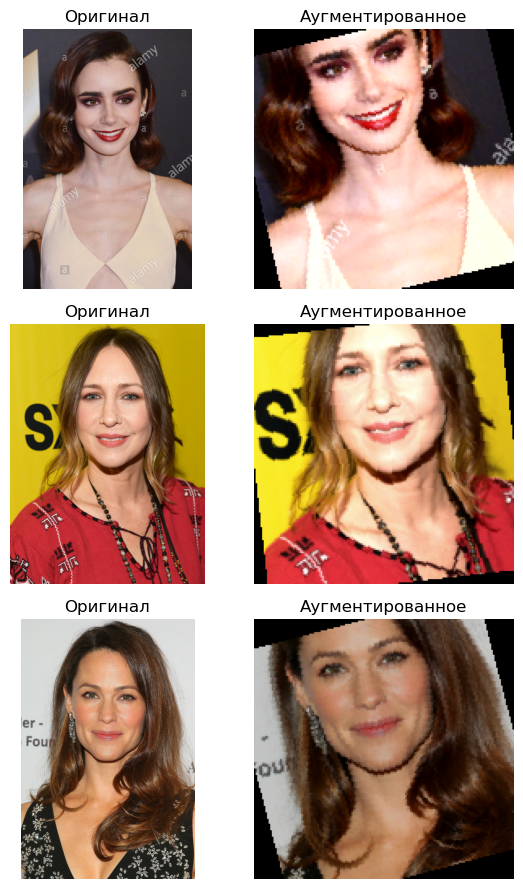

In [79]:
import random
import torch
import torchvision.transforms as transforms
import torchvision.transforms.functional as F
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt

train_dir = os.path.join(data_dir, 'training_set')

transform_train = transforms.Compose([
    transforms.Resize(180),
    transforms.CenterCrop(160),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.5] * 3, [0.5] * 3)
])

train_dataset = ImageFolder(train_dir, transform=transform_train)

plt.figure(figsize=(6, 9))
for i in range(3):
    idx = random.randint(0, len(train_dataset) - 1)
    image_path = train_dataset.samples[idx][0]
    original = Image.open(image_path).convert("RGB")
    augmented_tensor, _ = train_dataset[idx]
    augmented = F.to_pil_image(augmented_tensor * 0.5 + 0.5)

    plt.subplot(3, 2, i * 2 + 1)
    plt.imshow(original)
    plt.title("Оригинал")
    plt.axis('off')

    plt.subplot(3, 2, i * 2 + 2)
    plt.imshow(augmented)
    plt.title("Аугментированное")
    plt.axis('off')

plt.tight_layout()
plt.show()

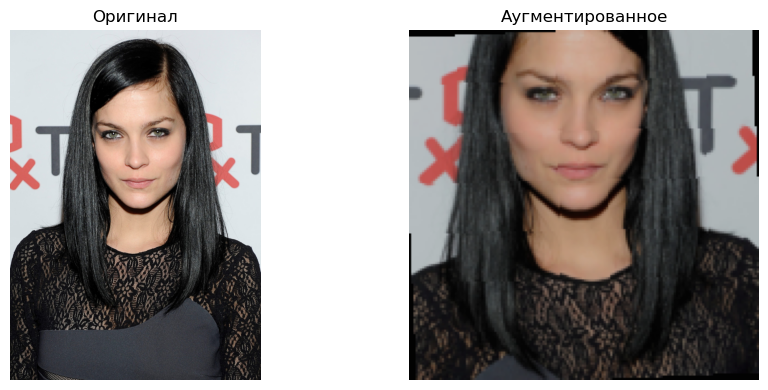

In [80]:
import random
import torch
import torchvision.transforms as transforms
import torchvision.transforms.functional as F
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt

train_dir = os.path.join(data_dir, 'training_set')

transform_train = transforms.Compose([
    transforms.Resize(180),
    transforms.CenterCrop(160),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.5] * 3, [0.5] * 3)
])
train_dataset = ImageFolder(train_dir, transform=transform_train)

def get_image_path_from_index(dataset, index):
    return dataset.samples[index][0]
sample_index = random.randint(0, len(train_dataset) - 1)

image_path = get_image_path_from_index(train_dataset, sample_index)
raw_image = Image.open(image_path).convert("RGB")
augmented_tensor, _ = train_dataset[sample_index]
augmented_image = F.to_pil_image(augmented_tensor * 0.5 + 0.5)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(raw_image)
plt.title("Оригинал")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(augmented_image)
plt.title("Аугментированное")
plt.axis('off')

plt.tight_layout()
plt.show()

### Объединение датасета с аугментированным датасетом

In [57]:
import os
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import ConcatDataset
from PIL import Image

In [58]:
# новый датасет = оригинальный датасет + набор аугментаций 
transform_base = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.ToTensor(),
    transforms.Normalize([0.5] * 3, [0.5] * 3)
])

transform_aug1 = transforms.Compose([
    transforms.Resize(180),
    transforms.CenterCrop(160),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.5] * 3, [0.5] * 3)
])

dataset_base = ImageFolder(train_dir, transform=transform_base)
dataset_aug1 = ImageFolder(train_dir, transform=transform_aug1)

dataset_combined = ConcatDataset([dataset_base, dataset_aug1])
loader_combined = DataLoader(dataset_combined, batch_size=32, shuffle=False)

print("Оригинальных изображений:", len(dataset_base))
print("Аугментированных изображений:", len(dataset_aug1))
print("Всего в объединённом датасете:", len(dataset_combined))

Оригинальных изображений: 4000
Аугментированных изображений: 4000
Всего в объединённом датасете: 8000


# Работа с моделями CNN
# Модель №1 
Это базовая модель без SE-блоков, без расширенной архитектуры и без label_smoothing. Только 3 сверточных блока, простой классификатор.

## Модель 1.1 На оригинальном датасете

In [85]:
import os
import torch
import torch.nn as nn
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, WeightedRandomSampler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

device = torch.device('mps' if torch.backends.mps.is_available() else 'cuda' if torch.cuda.is_available() \
                      else 'cpu')
print("Используем устройство:", device)

data_dir = '/Users/ruslan/Downloads/учёба/практика 4 курс/FaceShape Dataset'
train_dir = os.path.join(data_dir, 'training_set')
test_dir = os.path.join(data_dir, 'testing_set')

transform_train = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])
transform_test = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

train_dataset = datasets.ImageFolder(train_dir, transform=transform_train)
test_dataset = datasets.ImageFolder(test_dir, transform=transform_test)

class_counts = np.bincount([label for _, label in train_dataset])
class_weights = 1. / class_counts
weights = [class_weights[label] for _, label in train_dataset]
sampler = WeightedRandomSampler(weights, len(weights))

train_loader = DataLoader(train_dataset, batch_size=32, sampler=sampler)
test_loader = DataLoader(test_dataset, batch_size=32)

class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d(1)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        return self.classifier(x)

model = SimpleCNN(len(train_dataset.classes)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=1e-3,
    steps_per_epoch=len(train_loader), epochs=50)

epochs = 50
best_val_acc = 0
patience = 7
trigger_times = 0
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(epochs):
    model.train()
    total_loss, correct, total = 0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()
        total_loss += loss.item()
        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_acc = correct / total
    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_acc)

    model.eval()
    correct, total, val_loss = 0, 0, 0
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            preds = outputs.argmax(dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    val_acc = correct / total
    val_loss /= len(test_loader)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    print(f"Эпоха {epoch+1}/{epochs} - Train Loss: {avg_train_loss:.4f}, Train Acc: {train_acc:.2%} | Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2%}")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        trigger_times = 0
        torch.save(model.state_dict(), "simple_cnn.pth")
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print("\nСработала остановка.")
            break

print("\nЛучшая модель сохранена: best_attention_cnn.pth")


Используем устройство: mps
Эпоха 1/50 - Train Loss: 1.6116, Train Acc: 21.16% | Val Loss: 1.6107, Val Acc: 20.00%
Эпоха 2/50 - Train Loss: 1.6090, Train Acc: 20.81% | Val Loss: 1.6080, Val Acc: 21.90%
Эпоха 3/50 - Train Loss: 1.6070, Train Acc: 22.36% | Val Loss: 1.6070, Val Acc: 20.50%
Эпоха 4/50 - Train Loss: 1.6059, Train Acc: 22.53% | Val Loss: 1.6029, Val Acc: 21.90%
Эпоха 5/50 - Train Loss: 1.6042, Train Acc: 22.76% | Val Loss: 1.6013, Val Acc: 23.70%
Эпоха 6/50 - Train Loss: 1.5963, Train Acc: 24.26% | Val Loss: 1.5991, Val Acc: 23.10%
Эпоха 7/50 - Train Loss: 1.6020, Train Acc: 23.81% | Val Loss: 1.6015, Val Acc: 21.60%
Эпоха 8/50 - Train Loss: 1.5960, Train Acc: 24.63% | Val Loss: 1.5939, Val Acc: 24.20%
Эпоха 9/50 - Train Loss: 1.5928, Train Acc: 24.71% | Val Loss: 1.5978, Val Acc: 24.80%
Эпоха 10/50 - Train Loss: 1.5930, Train Acc: 24.78% | Val Loss: 1.5855, Val Acc: 25.80%
Эпоха 11/50 - Train Loss: 1.5943, Train Acc: 24.16% | Val Loss: 1.5879, Val Acc: 24.70%
Эпоха 12/50 - 

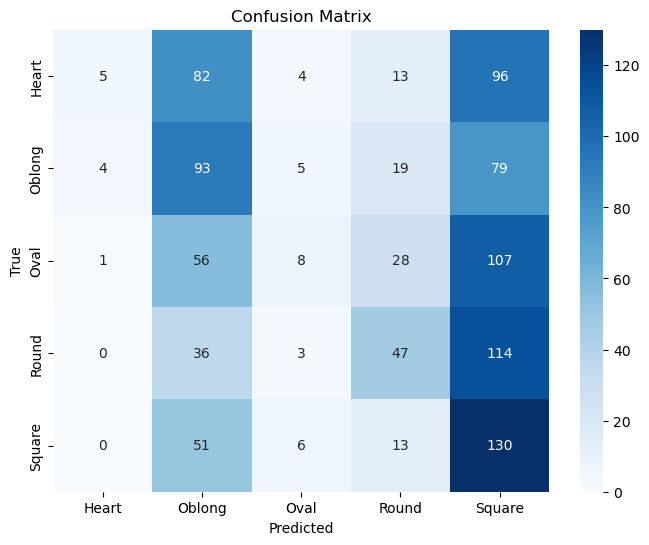


Классификационный отчёт:

              precision    recall  f1-score   support

       Heart       0.50      0.03      0.05       200
      Oblong       0.29      0.47      0.36       200
        Oval       0.31      0.04      0.07       200
       Round       0.39      0.23      0.29       200
      Square       0.25      0.65      0.36       200

    accuracy                           0.28      1000
   macro avg       0.35      0.28      0.23      1000
weighted avg       0.35      0.28      0.23      1000



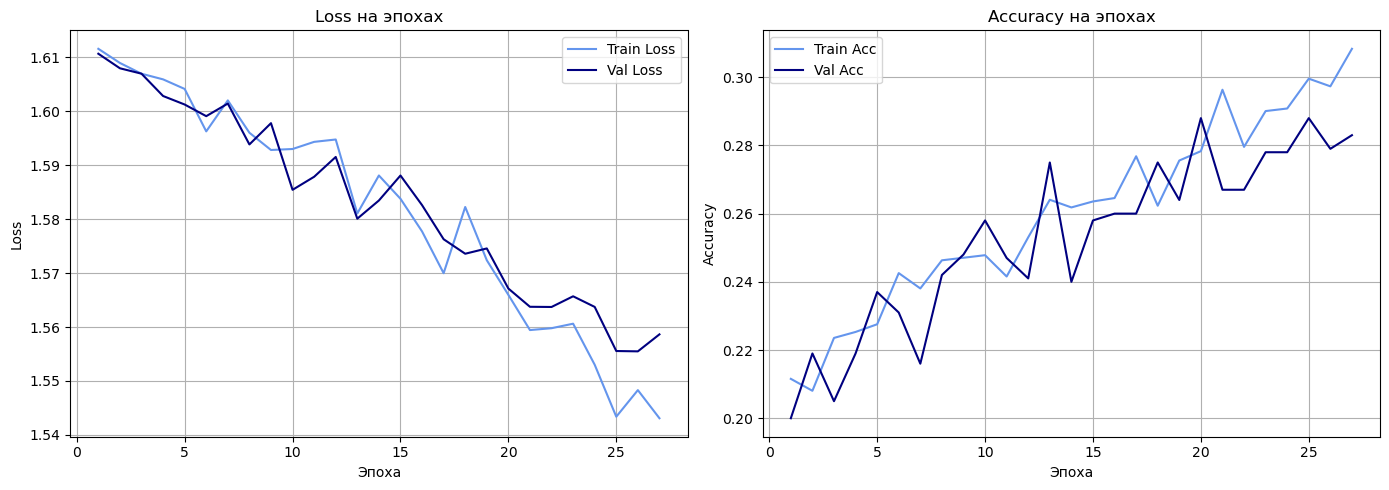

In [86]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",  
            xticklabels=test_dataset.classes,
            yticklabels=test_dataset.classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print("\nКлассификационный отчёт:\n")
print(classification_report(all_labels, all_preds,
                            target_names=test_dataset.classes,
                            zero_division=0))

epochs_range = range(1, len(train_losses) + 1)
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label='Train Loss', color='cornflowerblue')
plt.plot(epochs_range, val_losses, label='Val Loss', color='navy')
plt.xlabel('Эпоха')
plt.ylabel('Loss')
plt.title('Loss на эпохах')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracies, label='Train Acc', color='cornflowerblue')
plt.plot(epochs_range, val_accuracies, label='Val Acc', color='navy')
plt.xlabel('Эпоха')
plt.ylabel('Accuracy')
plt.title('Accuracy на эпохах')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Модель №1.2 На увеличеном датасете

In [40]:
import os
import torch
import torch.nn as nn
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, WeightedRandomSampler, ConcatDataset
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

device = torch.device('mps' if torch.backends.mps.is_available() else 'cuda' if torch.cuda.is_available() else 'cpu')
print("Используем устройство:", device)

data_dir = '/Users/ruslan/Downloads/учёба/практика 4 курс/FaceShape Dataset'
train_dir = os.path.join(data_dir, 'training_set')
test_dir = os.path.join(data_dir, 'testing_set')

transform_train = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

transform_aug1 = transforms.Compose([
    transforms.Resize(180),
    transforms.CenterCrop(160),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

transform_test = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

dataset_base = datasets.ImageFolder(train_dir, transform=transform_train)
dataset_aug = datasets.ImageFolder(train_dir, transform=transform_aug1)
train_dataset = ConcatDataset([dataset_base, dataset_aug])

test_dataset = datasets.ImageFolder(test_dir, transform=transform_test)

all_labels = [label for _, label in dataset_base] + [label for _, label in dataset_aug]
class_counts = np.bincount(all_labels)
class_weights = 1. / class_counts
weights = [class_weights[label] for label in all_labels]
sampler = WeightedRandomSampler(weights, len(weights))

train_loader = DataLoader(train_dataset, batch_size=32, sampler=sampler)
test_loader = DataLoader(test_dataset, batch_size=32)

print("Оригинальных изображений:", len(dataset_base))
print("Аугментированных изображений:", len(dataset_aug))
print("Всего в объединённом датасете:", len(train_dataset))

class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d(1)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        return self.classifier(x)

model = SimpleCNN(len(dataset_base.classes)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

scheduler = torch.optim.lr_scheduler.OneCycleLR(
    optimizer, max_lr=1e-3, steps_per_epoch=len(train_loader), epochs=50
)

epochs = 50
best_val_acc = 0
patience = 7
trigger_times = 0
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(epochs):
    model.train()
    total_loss, correct, total = 0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()
        total_loss += loss.item()
        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_acc = correct / total
    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_acc)

    model.eval()
    correct, total, val_loss = 0, 0, 0
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            preds = outputs.argmax(dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    val_acc = correct / total
    val_loss /= len(test_loader)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    print(f"Эпоха {epoch+1}/{epochs} - Train Loss: {avg_train_loss:.4f}, Train Acc: {train_acc:.2%} | Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2%}")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        trigger_times = 0
        torch.save(model.state_dict(), "simple_cnn.pth")
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print("\nСработала остановка.")
            break

print("\nЛучшая модель сохранена: simple_cnn.pth")

Используем устройство: mps
Оригинальных изображений: 3999
Аугментированных изображений: 3999
Всего в объединённом датасете: 7998
Эпоха 1/50 - Train Loss: 1.6096, Train Acc: 21.78% | Val Loss: 1.6092, Val Acc: 22.50%
Эпоха 2/50 - Train Loss: 1.6091, Train Acc: 21.92% | Val Loss: 1.6073, Val Acc: 20.60%
Эпоха 3/50 - Train Loss: 1.6067, Train Acc: 21.81% | Val Loss: 1.6040, Val Acc: 23.20%
Эпоха 4/50 - Train Loss: 1.6028, Train Acc: 22.72% | Val Loss: 1.5981, Val Acc: 23.60%
Эпоха 5/50 - Train Loss: 1.5970, Train Acc: 24.36% | Val Loss: 1.5927, Val Acc: 24.50%
Эпоха 6/50 - Train Loss: 1.5975, Train Acc: 23.79% | Val Loss: 1.5891, Val Acc: 26.20%
Эпоха 7/50 - Train Loss: 1.5959, Train Acc: 24.38% | Val Loss: 1.5929, Val Acc: 22.70%
Эпоха 8/50 - Train Loss: 1.5888, Train Acc: 26.29% | Val Loss: 1.5878, Val Acc: 24.00%
Эпоха 9/50 - Train Loss: 1.5876, Train Acc: 25.94% | Val Loss: 1.5729, Val Acc: 27.90%
Эпоха 10/50 - Train Loss: 1.5843, Train Acc: 25.86% | Val Loss: 1.5756, Val Acc: 27.00%


#### Отчёт обучения модели 1.2

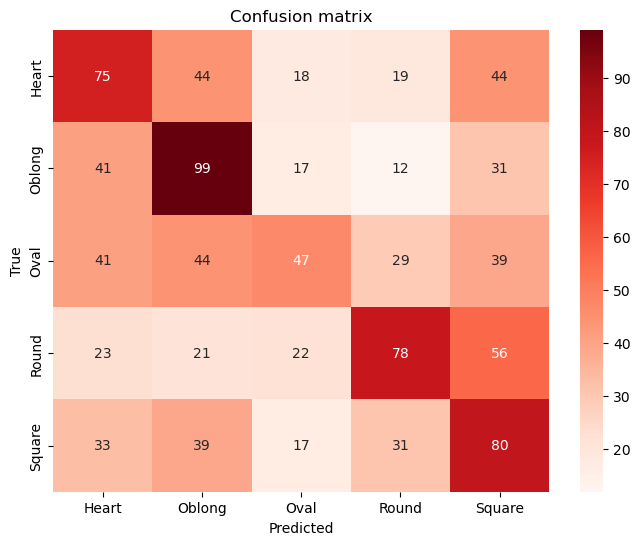


Классификационный отчёт:

              precision    recall  f1-score   support

       Heart       0.35      0.38      0.36       200
      Oblong       0.40      0.49      0.44       200
        Oval       0.39      0.23      0.29       200
       Round       0.46      0.39      0.42       200
      Square       0.32      0.40      0.36       200

    accuracy                           0.38      1000
   macro avg       0.38      0.38      0.38      1000
weighted avg       0.38      0.38      0.38      1000



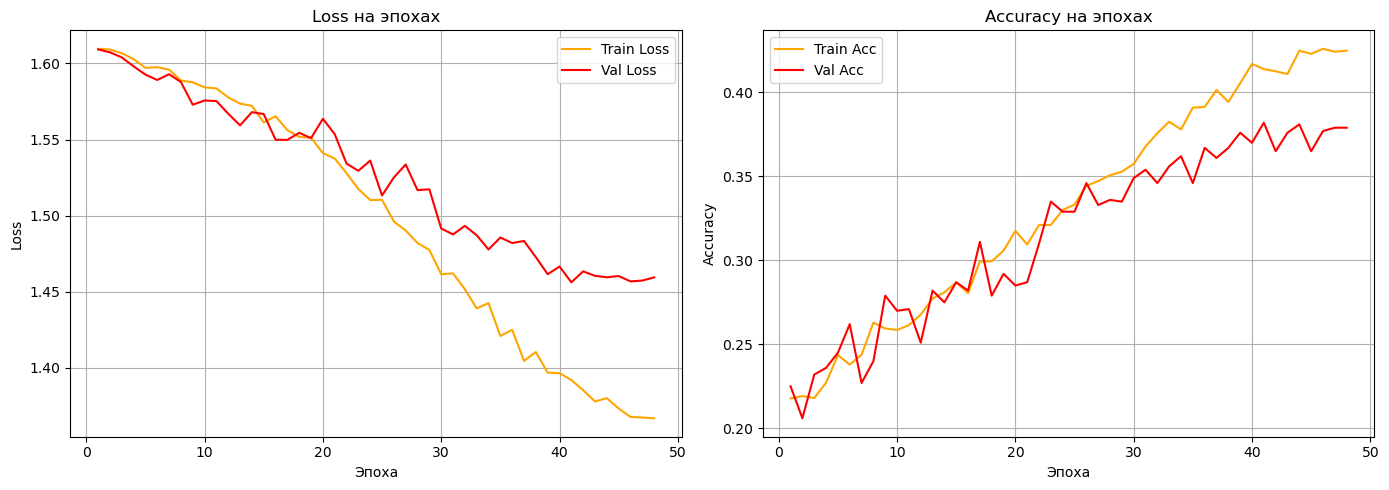

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",
            xticklabels=train_dataset.datasets[0].classes,
            yticklabels=train_dataset.datasets[0].classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Сonfusion matrix")
plt.show()

print("\nКлассификационный отчёт:\n")
print(classification_report(all_labels, all_preds,
                            target_names=train_dataset.datasets[0].classes,
                            zero_division=0))

epochs_range = range(1, len(train_losses) + 1)
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label='Train Loss', color='orange')
plt.plot(epochs_range, val_losses, label='Val Loss', color='red')
plt.xlabel('Эпоха')
plt.ylabel('Loss')
plt.title('Loss на эпохах')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracies, label='Train Acc', color='orange')
plt.plot(epochs_range, val_accuracies, label='Val Acc', color='red')
plt.xlabel('Эпоха')
plt.ylabel('Accuracy')
plt.title('Accuracy на эпохах')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Модель №2
Добавлен BatchNorm + Label Smoothing + Scheduler

Что добавлено:

	•	BatchNorm2d для ускорения сходимости
	•	LabelSmoothing для повышения обобщающей способности
	•	OneCycleLR как продвинутый план обучения

In [42]:
import os
import torch
import torch.nn as nn
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, WeightedRandomSampler, ConcatDataset
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

device = torch.device('mps' if torch.backends.mps.is_available()
                      else 'cuda' if torch.cuda.is_available() else 'cpu')
print("Используем устройство:", device)

data_dir = '/Users/ruslan/Downloads/учёба/практика 4 курс/FaceShape Dataset'
train_dir = os.path.join(data_dir, 'training_set')
test_dir = os.path.join(data_dir, 'testing_set')

transform_base = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.5] * 3, [0.5] * 3)
])

transform_aug1 = transforms.Compose([
    transforms.Resize(180),
    transforms.CenterCrop(160),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.5] * 3, [0.5] * 3)
])

transform_test = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.ToTensor(),
    transforms.Normalize([0.5] * 3, [0.5] * 3)
])

dataset_base = datasets.ImageFolder(train_dir, transform=transform_base)
dataset_aug = datasets.ImageFolder(train_dir, transform=transform_aug1)
train_dataset = ConcatDataset([dataset_base, dataset_aug])
test_dataset = datasets.ImageFolder(test_dir, transform=transform_test)

all_labels = [label for _, label in dataset_base] + [label for _, label in dataset_aug]
class_counts = np.bincount(all_labels)
class_weights = 1. / class_counts
weights = [class_weights[label] for label in all_labels]
sampler = WeightedRandomSampler(weights, len(weights))

train_loader = DataLoader(train_dataset, batch_size=32, sampler=sampler)
test_loader = DataLoader(test_dataset, batch_size=32)

print("Оригинальных изображений:", len(dataset_base))
print("Аугментированных изображений:", len(dataset_aug))
print("Всего в объединённом датасете:", len(train_dataset))

class ImprovedCNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d(1)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.classifier(self.features(x))

model = ImprovedCNN(len(dataset_base.classes)).to(device)
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.OneCycleLR(
    optimizer, max_lr=1e-3, steps_per_epoch=len(train_loader), epochs=50
)

epochs = 50
best_val_acc = 0
patience = 7
trigger_times = 0
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(epochs):
    model.train()
    total_loss, correct, total = 0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()
        total_loss += loss.item()
        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_acc = correct / total
    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_acc)

    model.eval()
    correct, total, val_loss = 0, 0, 0
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            preds = outputs.argmax(dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    val_acc = correct / total
    val_loss /= len(test_loader)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    print(f"Эпоха {epoch+1}/{epochs} - Train Loss: {avg_train_loss:.4f}, Train Acc: {train_acc:.2%} | Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2%}")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        trigger_times = 0
        torch.save(model.state_dict(), "improved_augmented_cnn.pth")
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print("\nСработала остановка.")
            break

print("\nЛучшая модель сохранена: improved_augmented_cnn.pth")

Используем устройство: mps
Оригинальных изображений: 3999
Аугментированных изображений: 3999
Всего в объединённом датасете: 7998
Эпоха 1/50 - Train Loss: 1.6012, Train Acc: 24.44% | Val Loss: 1.5877, Val Acc: 27.10%
Эпоха 2/50 - Train Loss: 1.5897, Train Acc: 26.59% | Val Loss: 1.5754, Val Acc: 27.40%
Эпоха 3/50 - Train Loss: 1.5803, Train Acc: 26.98% | Val Loss: 1.5719, Val Acc: 27.80%
Эпоха 4/50 - Train Loss: 1.5718, Train Acc: 28.82% | Val Loss: 1.5680, Val Acc: 28.70%
Эпоха 5/50 - Train Loss: 1.5667, Train Acc: 30.27% | Val Loss: 1.5661, Val Acc: 27.80%
Эпоха 6/50 - Train Loss: 1.5701, Train Acc: 29.02% | Val Loss: 1.5633, Val Acc: 28.40%
Эпоха 7/50 - Train Loss: 1.5678, Train Acc: 29.32% | Val Loss: 1.5753, Val Acc: 28.10%
Эпоха 8/50 - Train Loss: 1.5656, Train Acc: 29.94% | Val Loss: 1.5879, Val Acc: 26.70%
Эпоха 9/50 - Train Loss: 1.5559, Train Acc: 31.12% | Val Loss: 1.6154, Val Acc: 27.20%
Эпоха 10/50 - Train Loss: 1.5578, Train Acc: 30.80% | Val Loss: 1.5518, Val Acc: 29.70%


### Отчёт модели 2

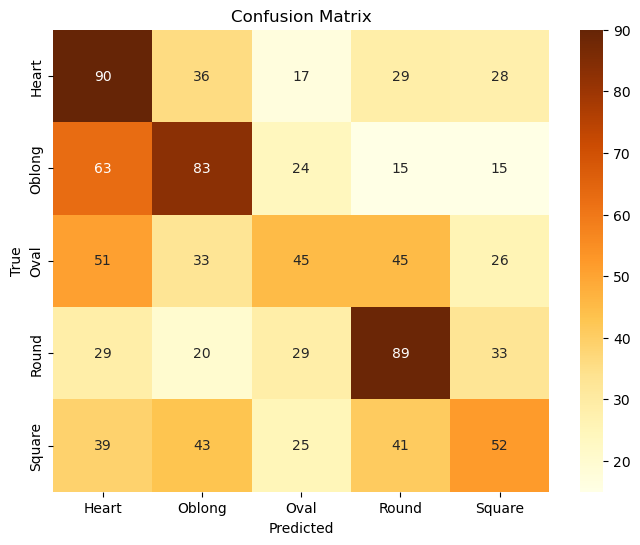


Классификационный отчёт:

              precision    recall  f1-score   support

       Heart       0.33      0.45      0.38       200
      Oblong       0.39      0.41      0.40       200
        Oval       0.32      0.23      0.26       200
       Round       0.41      0.45      0.42       200
      Square       0.34      0.26      0.29       200

    accuracy                           0.36      1000
   macro avg       0.36      0.36      0.35      1000
weighted avg       0.36      0.36      0.35      1000



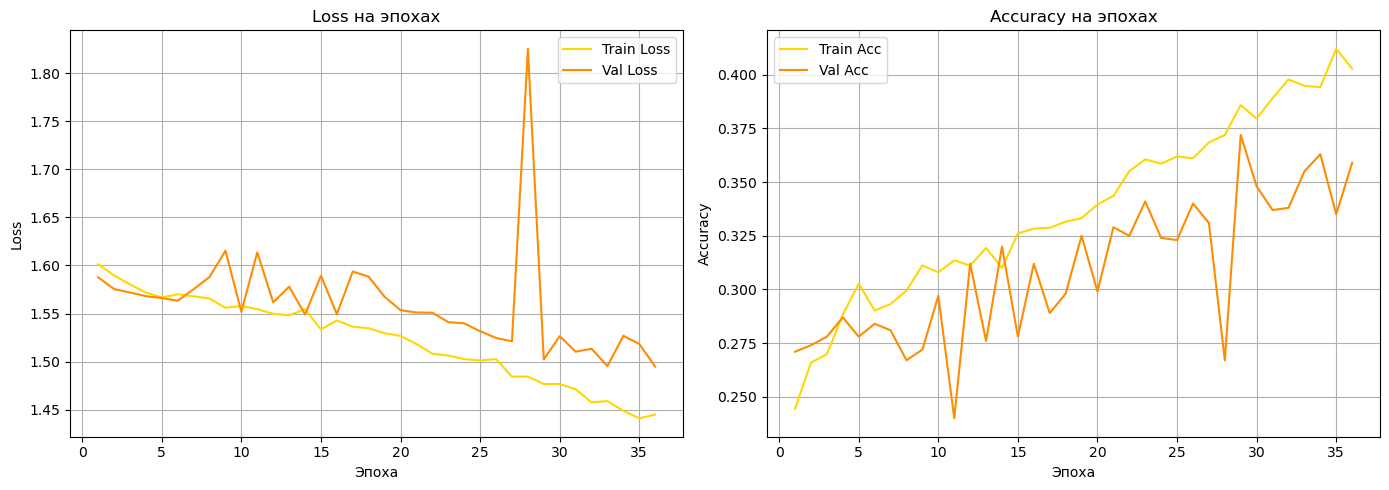

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlOrBr",  
            xticklabels=train_dataset.datasets[0].classes,
            yticklabels=train_dataset.datasets[0].classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print("\nКлассификационный отчёт:\n")
print(classification_report(all_labels, all_preds,
                            target_names=train_dataset.datasets[0].classes,
                            zero_division=0))

epochs_range = range(1, len(train_losses) + 1)
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label='Train Loss', color='gold')
plt.plot(epochs_range, val_losses, label='Val Loss', color='darkorange')
plt.xlabel('Эпоха')
plt.ylabel('Loss')
plt.title('Loss на эпохах')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracies, label='Train Acc', color='gold')
plt.plot(epochs_range, val_accuracies, label='Val Acc', color='darkorange')
plt.xlabel('Эпоха')
plt.ylabel('Accuracy')
plt.title('Accuracy на эпохах')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Модель 3. 
Расширенная CNN с SE-блоками и активацией SiLU

Что добавлено:

	•	SE-блоки — фокус на важных признаках
	•	SiLU (Swish) вместо ReLU
	•	Расширенная архитектура (больше слоёв)

In [44]:
import os
import torch
import torch.nn as nn
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, WeightedRandomSampler, ConcatDataset
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

device = torch.device('mps' if torch.backends.mps.is_available()
                      else 'cuda' if torch.cuda.is_available() else 'cpu')
print("Используем устройство:", device)

data_dir = '/Users/ruslan/Downloads/учёба/практика 4 курс/FaceShape Dataset'
train_dir = os.path.join(data_dir, 'training_set')
test_dir = os.path.join(data_dir, 'testing_set')

transform_base = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.5] * 3, [0.5] * 3)
])

transform_aug1 = transforms.Compose([
    transforms.Resize(180),
    transforms.CenterCrop(160),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.5] * 3, [0.5] * 3)
])

transform_test = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.ToTensor(),
    transforms.Normalize([0.5] * 3, [0.5] * 3)
])

dataset_base = datasets.ImageFolder(train_dir, transform=transform_base)
dataset_aug = datasets.ImageFolder(train_dir, transform=transform_aug1)
train_dataset = ConcatDataset([dataset_base, dataset_aug])
test_dataset = datasets.ImageFolder(test_dir, transform=transform_test)

print("Оригинальных изображений:", len(dataset_base))
print("Аугментированных изображений:", len(dataset_aug))
print("Всего в объединённом датасете:", len(train_dataset))

all_labels = [label for _, label in dataset_base] + [label for _, label in dataset_aug]
class_counts = np.bincount(all_labels)
class_weights = 1. / class_counts
weights = [class_weights[label] for label in all_labels]
sampler = WeightedRandomSampler(weights, len(weights))

train_loader = DataLoader(train_dataset, batch_size=32, sampler=sampler)
test_loader = DataLoader(test_dataset, batch_size=32)

class SEBlock(nn.Module):
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(channels, channels // reduction),
            nn.ReLU(),
            nn.Linear(channels // reduction, channels),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y

class AttentionCNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()

        def block(in_c, out_c):
            return nn.Sequential(
                nn.Conv2d(in_c, out_c, 3, padding=1),
                nn.BatchNorm2d(out_c),
                nn.SiLU(),
                SEBlock(out_c),
                nn.MaxPool2d(2)
            )
        self.features = nn.Sequential(
            block(3, 32),
            block(32, 64),
            block(64, 128),
            block(128, 256),
            block(256, 512),
            block(512, 768),
            nn.AdaptiveAvgPool2d(1)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(768, 384), nn.SiLU(), nn.Dropout(0.4),
            nn.Linear(384, 128), nn.SiLU(), nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.classifier(self.features(x))


num_classes = len(dataset_base.classes)
model = AttentionCNN(num_classes).to(device)

criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=1e-3,
    steps_per_epoch=len(train_loader), epochs=50)

epochs = 50
best_val_acc = 0
patience = 7
trigger_times = 0
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(epochs):
    model.train()
    total_loss, correct, total = 0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()
        total_loss += loss.item()
        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_acc = correct / total
    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_acc)

    model.eval()
    correct, total, val_loss = 0, 0, 0
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            preds = outputs.argmax(dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    val_acc = correct / total
    val_loss /= len(test_loader)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    print(f"Эпоха {epoch+1}/{epochs} - Train Loss: {avg_train_loss:.4f}, Train Acc: {train_acc:.2%} | Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2%}")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        trigger_times = 0
        torch.save(model.state_dict(), "best_attention_cnn.pth")
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print("\nСработала остановка.")
            break

print("\nЛучшая модель сохранена: best_attention_cnn.pth")

Используем устройство: mps
Оригинальных изображений: 3999
Аугментированных изображений: 3999
Всего в объединённом датасете: 7998
Эпоха 1/50 - Train Loss: 1.5826, Train Acc: 27.27% | Val Loss: 1.5402, Val Acc: 32.00%
Эпоха 2/50 - Train Loss: 1.4952, Train Acc: 35.50% | Val Loss: 1.4416, Val Acc: 39.80%
Эпоха 3/50 - Train Loss: 1.4076, Train Acc: 42.72% | Val Loss: 1.4563, Val Acc: 39.20%
Эпоха 4/50 - Train Loss: 1.3303, Train Acc: 48.20% | Val Loss: 1.3603, Val Acc: 47.30%
Эпоха 5/50 - Train Loss: 1.2785, Train Acc: 51.20% | Val Loss: 1.3537, Val Acc: 44.60%
Эпоха 6/50 - Train Loss: 1.2258, Train Acc: 54.74% | Val Loss: 1.2431, Val Acc: 51.70%
Эпоха 7/50 - Train Loss: 1.1636, Train Acc: 58.63% | Val Loss: 1.4356, Val Acc: 46.40%
Эпоха 8/50 - Train Loss: 1.1475, Train Acc: 59.89% | Val Loss: 1.4345, Val Acc: 43.40%
Эпоха 9/50 - Train Loss: 1.0685, Train Acc: 64.95% | Val Loss: 1.2010, Val Acc: 58.90%
Эпоха 10/50 - Train Loss: 1.0158, Train Acc: 68.03% | Val Loss: 1.2059, Val Acc: 54.90%


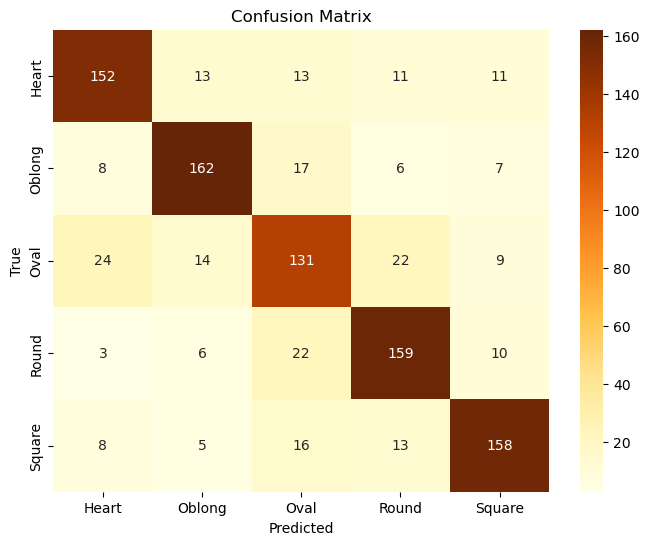


Классификационный отчёт:

              precision    recall  f1-score   support

       Heart       0.78      0.76      0.77       200
      Oblong       0.81      0.81      0.81       200
        Oval       0.66      0.66      0.66       200
       Round       0.75      0.80      0.77       200
      Square       0.81      0.79      0.80       200

    accuracy                           0.76      1000
   macro avg       0.76      0.76      0.76      1000
weighted avg       0.76      0.76      0.76      1000



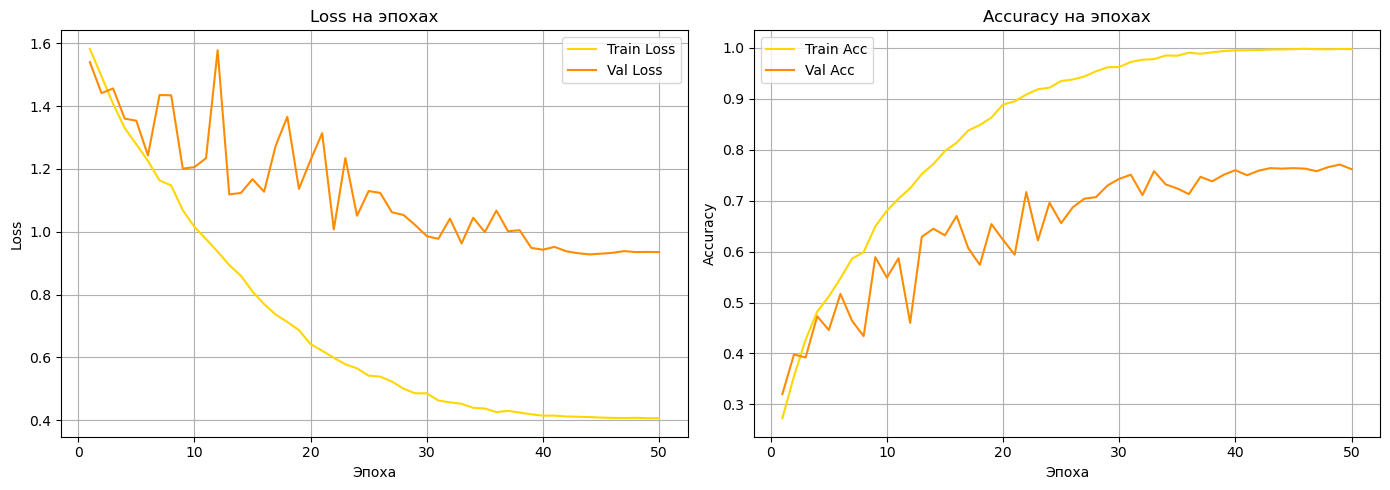

In [45]:
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlOrBr",
            xticklabels=train_dataset.datasets[0].classes,
            yticklabels=train_dataset.datasets[0].classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print("\nКлассификационный отчёт:\n")
print(classification_report(all_labels, all_preds,
                            target_names=train_dataset.datasets[0].classes,
                            zero_division=0))

epochs_range = range(1, len(train_losses) + 1)
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label='Train Loss', color='gold')
plt.plot(epochs_range, val_losses, label='Val Loss', color='darkorange')
plt.xlabel('Эпоха')
plt.ylabel('Loss')
plt.title('Loss на эпохах')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracies, label='Train Acc', color='gold')
plt.plot(epochs_range, val_accuracies, label='Val Acc', color='darkorange')
plt.xlabel('Эпоха')
plt.ylabel('Accuracy')
plt.title('Accuracy на эпохах')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Модель №4

	•	Усиленная аугментация: добавлены ColorJitter, RandomAffine и RandomErasing.
	•	Balanced Sampler: взвешенная выборка для компенсации дисбаланса классов.
	•	SE-блоки: внимание каналов после каждого Conv-блока.
	•	Глубокая архитектура: 7 уровней свёрток (до 768 каналов).
	•	OneCycleLR с pct_start=0.2 и div_factor=25 для более плавного изменения LR.
	•	Label smoothing в CrossEntropyLoss (0.1).
	•	EarlyStopping с patience=8 и сохранение лучшей модели.

In [46]:
import os
import torch
import torch.nn as nn
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, WeightedRandomSampler, ConcatDataset
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

device = torch.device('mps' if torch.backends.mps.is_available() else
                      'cuda' if torch.cuda.is_available() else 'cpu')
print("Используем устройство:", device)

data_dir = '/Users/ruslan/Downloads/учёба/практика 4 курс/FaceShape Dataset'
train_dir = os.path.join(data_dir, 'training_set')
test_dir = os.path.join(data_dir, 'testing_set')

transform_base = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.5] * 3, [0.5] * 3)
])
transform_aug = transforms.Compose([
    transforms.Resize(180),
    transforms.CenterCrop(160),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.5] * 3, [0.5] * 3)
])
transform_test = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.ToTensor(),
    transforms.Normalize([0.5] * 3, [0.5] * 3)
])

dataset_base = datasets.ImageFolder(train_dir, transform=transform_base)
dataset_aug  = datasets.ImageFolder(train_dir, transform=transform_aug)
train_dataset = ConcatDataset([dataset_base, dataset_aug])
test_dataset  = datasets.ImageFolder(test_dir, transform=transform_test)

print("Оригинальных изображений:", len(dataset_base))
print("Аугментированных изображений:", len(dataset_aug))
print("Всего в объединённом датасете:", len(train_dataset))

all_labels = [label for _, label in dataset_base] + [label for _, label in dataset_aug]
class_counts = np.bincount(all_labels)
class_weights = 1. / class_counts
weights = [class_weights[label] for label in all_labels]
sampler = WeightedRandomSampler(weights, len(weights))

train_loader = DataLoader(train_dataset, batch_size=32, sampler=sampler)
test_loader = DataLoader(test_dataset, batch_size=32)

class SEBlock(nn.Module):
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(channels, channels // reduction),
            nn.ReLU(),
            nn.Linear(channels // reduction, channels),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y

class AttentionCNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        def block(in_c, out_c):
            return nn.Sequential(
                nn.Conv2d(in_c, out_c, 3, padding=1),
                nn.BatchNorm2d(out_c),
                nn.SiLU(),
                SEBlock(out_c),
                nn.MaxPool2d(2)
            )

        self.features = nn.Sequential(
            block(3, 32),
            block(32, 64),
            block(64, 128),
            block(128, 256),
            block(256, 512),
            block(512, 768),
            nn.AdaptiveAvgPool2d(1)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(768, 384), nn.SiLU(), nn.Dropout(0.4),
            nn.Linear(384, 128), nn.SiLU(), nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.classifier(self.features(x))

num_classes = len(dataset_base.classes)
model = AttentionCNN(num_classes).to(device)

criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-3)
scheduler = torch.optim.lr_scheduler.OneCycleLR(
    optimizer, max_lr=1e-3,
    steps_per_epoch=len(train_loader),
    epochs=60,
    pct_start=0.2,
    div_factor=25
)

epochs = 60
best_val_acc = 0

patience = 8
trigger_times = 0
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(1, epochs + 1):
    model.train()
    total_loss, correct, total = 0.0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        alpha = 0.2
        lam = np.random.beta(alpha, alpha)
        index = torch.randperm(images.size(0)).to(device)
        mixed_images = lam * images + (1 - lam) * images[index]
        targets_a, targets_b = labels, labels[index]
        outputs = model(mixed_images)
        loss = lam * criterion(outputs, targets_a) + (1 - lam) * criterion(outputs, targets_b)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()

        total_loss += loss.item()
        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_losses.append(total_loss / len(train_loader))
    train_accuracies.append(correct / total)

    model.eval()
    val_loss, correct, total = 0.0, 0, 0
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            preds = outputs.argmax(dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    val_losses.append(val_loss / len(test_loader))
    val_accuracies.append(correct / total)

    print(f"Эпоха {epoch}/{epochs} - Train Loss: {train_losses[-1]:.4f}, "
          f"Train Acc: {train_accuracies[-1]*100:.2f}% | Val Loss: {val_losses[-1]:.4f}, "
          f"Val Acc: {val_accuracies[-1]*100:.2f}%")

    if val_accuracies[-1] > best_val_acc:
        best_val_acc = val_accuracies[-1]
        trigger_times = 0
        torch.save(model.state_dict(), "best_attention_cnn.pth")
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print("\nСработала остановка.")
            break

print("\nЛучшая модель сохранена: best_attention_cnn.pth")

Используем устройство: mps
Оригинальных изображений: 3999
Аугментированных изображений: 3999
Всего в объединённом датасете: 7998
Эпоха 1/60 - Train Loss: 1.5869, Train Acc: 27.51% | Val Loss: 1.5632, Val Acc: 29.80%
Эпоха 2/60 - Train Loss: 1.5083, Train Acc: 35.88% | Val Loss: 1.4341, Val Acc: 40.10%
Эпоха 3/60 - Train Loss: 1.4098, Train Acc: 42.01% | Val Loss: 1.5575, Val Acc: 38.30%
Эпоха 4/60 - Train Loss: 1.3472, Train Acc: 46.99% | Val Loss: 1.3855, Val Acc: 41.50%
Эпоха 5/60 - Train Loss: 1.2869, Train Acc: 50.86% | Val Loss: 1.4632, Val Acc: 41.60%
Эпоха 6/60 - Train Loss: 1.2312, Train Acc: 55.05% | Val Loss: 1.3577, Val Acc: 48.30%
Эпоха 7/60 - Train Loss: 1.1758, Train Acc: 58.59% | Val Loss: 1.4979, Val Acc: 47.20%
Эпоха 8/60 - Train Loss: 1.1101, Train Acc: 62.34% | Val Loss: 1.3257, Val Acc: 53.40%
Эпоха 9/60 - Train Loss: 1.0819, Train Acc: 63.99% | Val Loss: 1.2677, Val Acc: 53.60%
Эпоха 10/60 - Train Loss: 1.0081, Train Acc: 68.29% | Val Loss: 1.2446, Val Acc: 56.50%


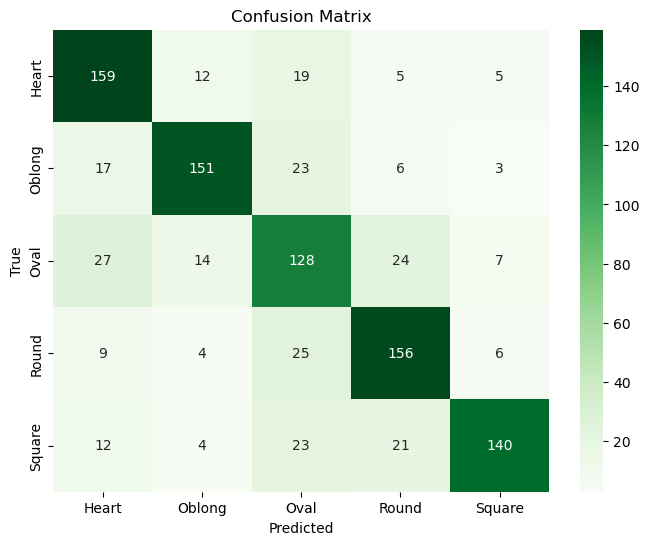


Классификационный отчёт:

              precision    recall  f1-score   support

       Heart       0.71      0.80      0.75       200
      Oblong       0.82      0.76      0.78       200
        Oval       0.59      0.64      0.61       200
       Round       0.74      0.78      0.76       200
      Square       0.87      0.70      0.78       200

    accuracy                           0.73      1000
   macro avg       0.74      0.73      0.74      1000
weighted avg       0.74      0.73      0.74      1000



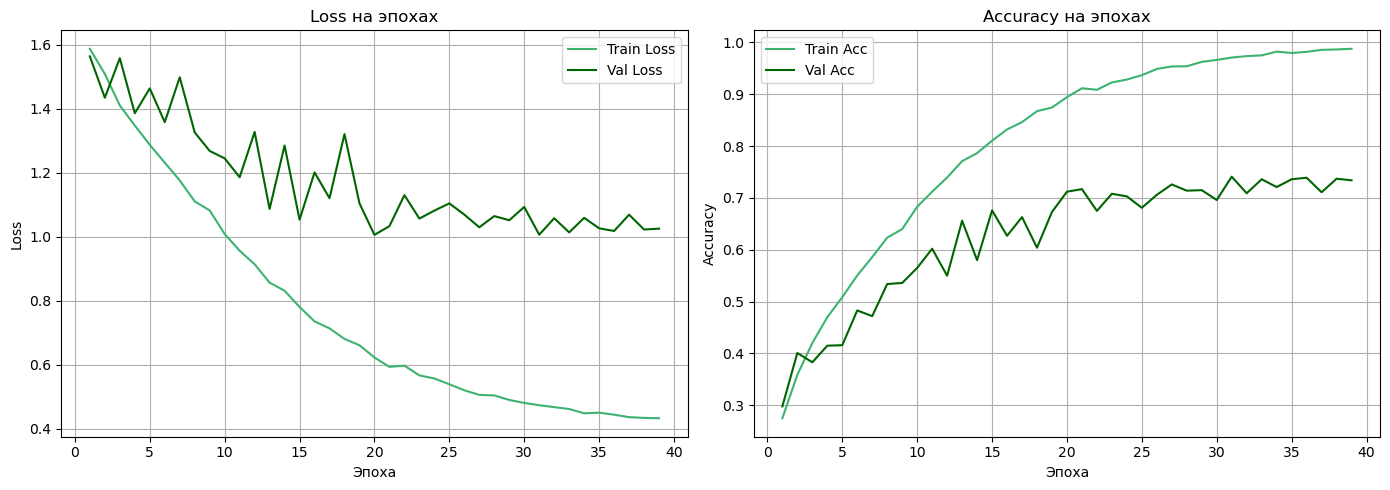

In [47]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",  
            xticklabels=train_dataset.datasets[0].classes,
            yticklabels=train_dataset.datasets[0].classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print("\nКлассификационный отчёт:\n")
print(classification_report(all_labels, all_preds,
                            target_names=train_dataset.datasets[0].classes,
                            zero_division=0))

epochs_range = range(1, len(train_losses) + 1)
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label='Train Loss', color='mediumseagreen')
plt.plot(epochs_range, val_losses, label='Val Loss', color='darkgreen')
plt.xlabel('Эпоха')
plt.ylabel('Loss')
plt.title('Loss на эпохах')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracies, label='Train Acc', color='mediumseagreen')
plt.plot(epochs_range, val_accuracies, label='Val Acc', color='darkgreen')
plt.xlabel('Эпоха')
plt.ylabel('Accuracy')
plt.title('Accuracy на эпохах')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Модель №5. Последняя. C точностью 75%.

	•	SE-блоки (channel attention)
	•	SiLU-активация
	•	глубокая CNN-архитектура
	•	нормализация и Dropout
	•	OneCycleLR, label_smoothing, WeightedRandomSampler
	•	частично добавлен MixUp

In [48]:
import os
import torch
import torch.nn as nn
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, WeightedRandomSampler, ConcatDataset
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

device = torch.device('mps' if torch.backends.mps.is_available()
                      else 'cuda' if torch.cuda.is_available()
                      else 'cpu')
print("Используем устройство:", device)

data_dir = '/Users/ruslan/Downloads/учёба/практика 4 курс/FaceShape Dataset'
train_dir = os.path.join(data_dir, 'training_set')
test_dir = os.path.join(data_dir, 'testing_set')

transform_base = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.5] * 3, [0.5] * 3)
])

transform_aug = transforms.Compose([
    transforms.Resize(180),
    transforms.CenterCrop(160),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.5] * 3, [0.5] * 3)
])

transform_test = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.ToTensor(),
    transforms.Normalize([0.5] * 3, [0.5] * 3)
])

dataset_base = datasets.ImageFolder(train_dir, transform=transform_base)
dataset_aug  = datasets.ImageFolder(train_dir, transform=transform_aug)
train_dataset = ConcatDataset([dataset_base, dataset_aug])
test_dataset  = datasets.ImageFolder(test_dir, transform=transform_test)

print("Оригинальных изображений:", len(dataset_base))
print("Аугментированных изображений:", len(dataset_aug))
print("Всего в объединённом датасете:", len(train_dataset))

all_labels = [label for _, label in dataset_base] + [label for _, label in dataset_aug]
class_counts = np.bincount(all_labels)
class_weights = 1. / class_counts
weights = [class_weights[label] for label in all_labels]
sampler = WeightedRandomSampler(weights, len(weights))

train_loader = DataLoader(train_dataset, batch_size=32, sampler=sampler)
test_loader  = DataLoader(test_dataset, batch_size=32)

class SEBlock(nn.Module):
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(channels, channels // reduction),
            nn.ReLU(inplace=True),
            nn.Linear(channels // reduction, channels),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y

class EnhancedCNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        def block(in_c, out_c, dropout=0.0):
            return nn.Sequential(
                nn.Conv2d(in_c, out_c, 3, padding=1),
                nn.BatchNorm2d(out_c),
                nn.SiLU(),
                SEBlock(out_c),
                nn.Conv2d(out_c, out_c, 3, padding=1),
                nn.BatchNorm2d(out_c),
                nn.SiLU(),
                nn.MaxPool2d(2),
                nn.Dropout2d(dropout)
            )

        self.features = nn.Sequential(
            block(3,    32, 0.1),
            block(32,   64, 0.1),
            block(64,  128, 0.15),
            block(128, 256, 0.2),
            block(256, 512, 0.3),
            block(512, 768, 0.4),
            nn.AdaptiveAvgPool2d(1)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(768, 384), nn.SiLU(), nn.Dropout(0.4),
            nn.Linear(384, 128), nn.SiLU(), nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.classifier(self.features(x))

num_classes = len(dataset_base.classes)
model = EnhancedCNN(num_classes).to(device)

criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-3)
scheduler = torch.optim.lr_scheduler.OneCycleLR(
    optimizer,
    max_lr=1e-3,
    steps_per_epoch=len(train_loader),
    epochs=60,
    pct_start=0.2,
    div_factor=25
)

epochs = 60
patience = 8
best_val_acc = 0.0
trigger_times = 0
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(1, epochs + 1):
    model.train()
    total_loss, correct, total = 0.0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()

        total_loss += loss.item()
        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_losses.append(total_loss / len(train_loader))
    train_accuracies.append(correct / total)

    model.eval()
    val_loss, correct, total = 0.0, 0, 0
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            preds = outputs.argmax(dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    val_losses.append(val_loss / len(test_loader))
    val_accuracies.append(correct / total)

    print(f"Эпоха {epoch}/{epochs} - Train Loss: {train_losses[-1]:.4f}, "
          f"Train Acc: {train_accuracies[-1]*100:.2f}% | "
          f"Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracies[-1]*100:.2f}%")

    if val_accuracies[-1] > best_val_acc:
        best_val_acc = val_accuracies[-1]
        trigger_times = 0
        torch.save(model.state_dict(), "best_enhanced_cnn.pth")
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print("\nСработала остановка.")
            break

print("\nЛучшая модель сохранена: best_enhanced_cnn.pth")

Используем устройство: mps
Оригинальных изображений: 3999
Аугментированных изображений: 3999
Всего в объединённом датасете: 7998
Эпоха 1/60 - Train Loss: 1.6125, Train Acc: 21.11% | Val Loss: 1.5981, Val Acc: 22.80%
Эпоха 2/60 - Train Loss: 1.5846, Train Acc: 27.71% | Val Loss: 1.5551, Val Acc: 30.50%
Эпоха 3/60 - Train Loss: 1.5638, Train Acc: 29.72% | Val Loss: 1.5404, Val Acc: 34.60%
Эпоха 4/60 - Train Loss: 1.5453, Train Acc: 32.08% | Val Loss: 1.5142, Val Acc: 32.90%
Эпоха 5/60 - Train Loss: 1.4698, Train Acc: 38.00% | Val Loss: 1.4420, Val Acc: 37.70%
Эпоха 6/60 - Train Loss: 1.4345, Train Acc: 40.40% | Val Loss: 1.4068, Val Acc: 42.10%
Эпоха 7/60 - Train Loss: 1.4006, Train Acc: 41.92% | Val Loss: 1.4333, Val Acc: 40.50%
Эпоха 8/60 - Train Loss: 1.3557, Train Acc: 46.14% | Val Loss: 1.3788, Val Acc: 43.30%
Эпоха 9/60 - Train Loss: 1.3277, Train Acc: 48.44% | Val Loss: 1.3454, Val Acc: 44.00%
Эпоха 10/60 - Train Loss: 1.3040, Train Acc: 49.32% | Val Loss: 1.3369, Val Acc: 44.90%


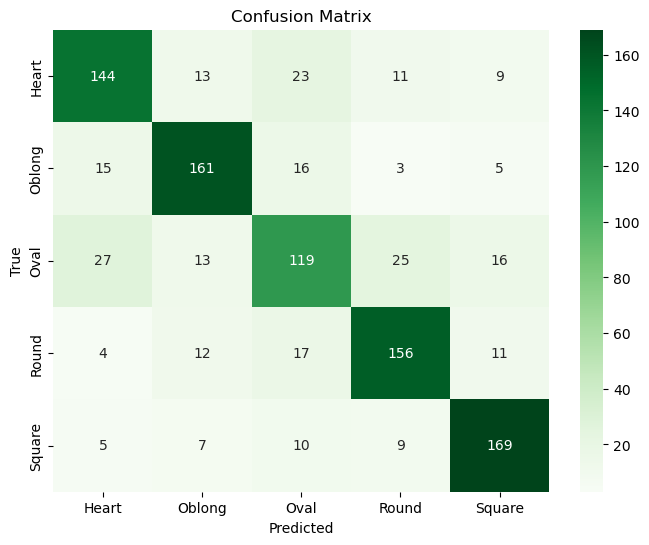


Классификационный отчёт:

              precision    recall  f1-score   support

       Heart       0.74      0.72      0.73       200
      Oblong       0.78      0.81      0.79       200
        Oval       0.64      0.59      0.62       200
       Round       0.76      0.78      0.77       200
      Square       0.80      0.84      0.82       200

    accuracy                           0.75      1000
   macro avg       0.75      0.75      0.75      1000
weighted avg       0.75      0.75      0.75      1000



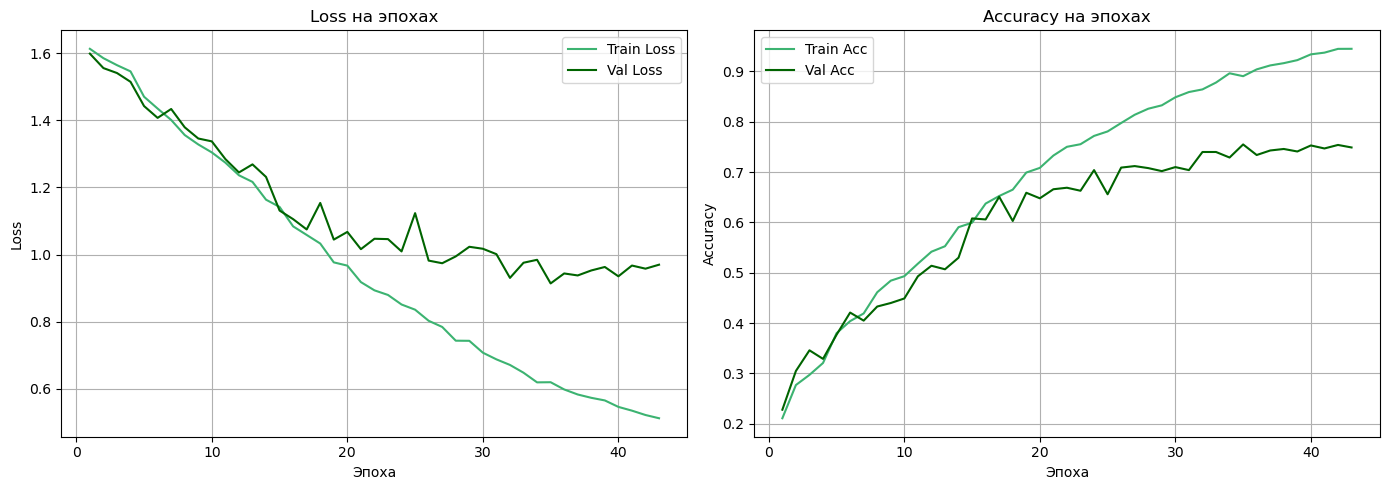

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",  
            xticklabels=test_dataset.classes,
            yticklabels=test_dataset.classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print("\nКлассификационный отчёт:\n")
print(classification_report(all_labels, all_preds,
                            target_names=test_dataset.classes,
                            zero_division=0))

epochs_range = range(1, len(train_losses) + 1)
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label='Train Loss', color='mediumseagreen')
plt.plot(epochs_range, val_losses, label='Val Loss', color='darkgreen')
plt.xlabel('Эпоха')
plt.ylabel('Loss')
plt.title('Loss на эпохах')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracies, label='Train Acc', color='mediumseagreen')
plt.plot(epochs_range, val_accuracies, label='Val Acc', color='darkgreen')
plt.xlabel('Эпоха')
plt.ylabel('Accuracy')
plt.title('Accuracy на эпохах')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()